# Analysis and visualization of various aspects of Jira ticket used in Technical Support team

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

###### Data collection

In [2]:
df1=pd.read_csv('CEDP Jira 2021-01-01--2021-03-24.csv')
df2=pd.read_csv('CEDP Jira 2021-03-25--2021-05-31.csv')
df3=pd.read_csv('CEDP Jira 2021-06-01--2021-08-15.csv')
df4=pd.read_csv('CEDP Jira 2021-08-16--2021-10-25.csv')
df5=pd.read_csv('CEDP Jira 2021-10-26--2021-12-31.csv')
   
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(985, 326)
(1000, 338)
(963, 363)
(963, 309)
(785, 309)


In [3]:
cols_required=['Summary','Issue Type','Status','Priority','Assignee','Component/s','Labels','Description','Created','Resolved','Custom field (NPS Rate)','Custom field (NPS Rating Comment)']
df1=df1[cols_required]
df2=df2[cols_required]
df3=df3[cols_required]
df4=df4[cols_required]
df5=df5[cols_required]

print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(985, 12)
(1000, 12)
(963, 12)
(963, 12)
(785, 12)


In [4]:
df_ticket=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)
print(df_ticket.columns)
# Showing dataset hiding one columns 'assignee' as it contains personal ID , that is like personal information  
df_ticket.loc[:,df_ticket.columns!='Assignee'].head()

Index(['Summary', 'Issue Type', 'Status', 'Priority', 'Assignee',
       'Component/s', 'Labels', 'Description', 'Created', 'Resolved',
       'Custom field (NPS Rate)', 'Custom field (NPS Rating Comment)'],
      dtype='object')


,Summary,Issue Type,Status,Priority,Component/s,Labels,Description,Created,Resolved,Custom field (NPS Rate),Custom field (NPS Rating Comment)
0,Cirrus CDO prod and test DataStage needs valid...,Service Request,Closed,Low,DataStage Access Request,Access,Background:\r\n\r\nData movement calls DataSta...,23/Mar/21 11:27 PM,29/Mar/21 7:06 PM,NaN,NaN
1,New project on Cirrus for mna-contract-harvesting,Service Request,Closed,Lowest,Other Access Request,Access,M&A Contract Harvesting is an existing CDO M&A...,23/Mar/21 10:20 PM,25/Mar/21 1:29 AM,NaN,NaN
2,Unable to run SQL in C360 SQL Query Prod,Service Request,Closed,Lowest,CEDP Cloud operations,NaN,"Hi Team,\r\n\r\nI got the follow error when I ...",23/Mar/21 9:13 PM,09/Apr/21 8:12 AM,NaN,NaN
3,Blue Fringe Setup for ECI Staging Cluster,Service Request,Closed,Lowest,CEDP Cloud operations,NaN,I need the following rules to be applied to ac...,23/Mar/21 8:08 PM,25/Mar/21 1:10 PM,NaN,NaN
4,Unable to connect to cedp authorization failed...,Service Request,Closed,Lowest,Other Access Request,User_to_Resolve,I find I am unable to connect to CEDP - gettin...,23/Mar/21 7:39 PM,23/Mar/21 8:04 PM,10.0,NaN


In [5]:
df_ticket.shape

(4696, 12)

In [6]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4696 entries, 0 to 4695
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Summary                            4696 non-null   object 
 1   Issue Type                         4696 non-null   object 
 2   Status                             4696 non-null   object 
 3   Priority                           4696 non-null   object 
 4   Assignee                           4696 non-null   object 
 5   Component/s                        4683 non-null   object 
 6   Labels                             3889 non-null   object 
 7   Description                        4355 non-null   object 
 8   Created                            4696 non-null   object 
 9   Resolved                           4670 non-null   object 
 10  Custom field (NPS Rate)            1337 non-null   float64
 11  Custom field (NPS Rating Comment)  75 non-null     objec

##### So, here all columns (except NPS Rate)are object type, means string type/categorical type
Data missing there in columns Component/s,Labels,Description,Created,Resolved,Custom field (NPS Rate),Custom field (NPS Rating Comment). Missing data handling required. 
NPS Rate is float here , should be converted to int type 

In [7]:
# Getting data with personal ID and working team name ID belongs to, data can't be displayed as it is personal informtaion 
Members_AssigneeTeam=pd.read_csv('Members_AssigneeTeam.csv')
print('Working Assignee team names in support project - \n',Members_AssigneeTeam.columns)

Working Assignee team names in support project - 
 Index(['Leader', 'L1', 'L2', 'Governance', 'Datastage', 'CloudOps', 'Infra',
       'Cp4d', 'K8', 'ERDM', 'Gov_Kyndryl', 'DataDiscovery', 'Others'],
      dtype='object')


## Data Preprocessing

In [8]:
# Rename some columns
df_ticket.rename(columns={'Issue Type':'Issue_Type','Custom field (NPS Rate)':'NPS_Rate','Custom field (NPS Rating Comment)':'NPS_Rating_Comment'},inplace=True)
df_ticket.columns

Index(['Summary', 'Issue_Type', 'Status', 'Priority', 'Assignee',
       'Component/s', 'Labels', 'Description', 'Created', 'Resolved',
       'NPS_Rate', 'NPS_Rating_Comment'],
      dtype='object')

### Missing data handling 

In [9]:
# Getting total count of missing value in each column

print(df_ticket.isnull().sum())
print('************')
# Getting percentage of total count of missing value in each column

print(df_ticket.isnull().mean()*100)

Summary                  0
Issue_Type               0
Status                   0
Priority                 0
Assignee                 0
Component/s             13
Labels                 807
Description            341
Created                  0
Resolved                26
NPS_Rate              3359
NPS_Rating_Comment    4621
dtype: int64
************
Summary                0.000000
Issue_Type             0.000000
Status                 0.000000
Priority               0.000000
Assignee               0.000000
Component/s            0.276831
Labels                17.184838
Description            7.261499
Created                0.000000
Resolved               0.553663
NPS_Rate              71.528961
NPS_Rating_Comment    98.402896
dtype: float64


In [10]:
df_ticket[df_ticket.Labels.isnull()]['Component/s'].value_counts()

CEDP Cloud operations                      799
Catalog a Database on DataStage Request      2
CEDP Access Request                          1
DB2W Access Request                          1
CEDP Learning Portfolio                      1
Functional ID Access Request                 1
Name: Component/s, dtype: int64

In [11]:
df_ticket[df_ticket['Component/s']=='CEDP Cloud operations'].isnull().sum()

Summary                  0
Issue_Type               0
Status                   0
Priority                 0
Assignee                 0
Component/s              0
Labels                 799
Description             52
Created                  0
Resolved                 7
NPS_Rate              1182
NPS_Rating_Comment    1492
dtype: int64

##### So, out of 807 Label missing , 799 is for component 'CEDP Cloud operations'

In [12]:
df_ticket[df_ticket['Component/s']=='CEDP Cloud operations']['Labels'].value_counts()

access                341
COS                    89
Bluefringe             46
NewCo                  40
kyndryl                31
DB2                    15
DB2WoC                 14
Kubernetes             12
firewall               12
logdna                 11
Access                  7
Support_bot             6
postgres                6
DB2W                    5
SQL_Query               5
redis                   4
Billing                 4
k8s                     4
openshift               4
Watson_Studio           4
Non_Support             4
Container_Registry      3
ElasticSearch           3
AppID                   3
kubernetes              3
CICD                    3
sysdig                  2
Cloudant                2
Kafka                   2
DB2WOC                  2
DataStage               1
datastage               1
acess                   1
Namespaces              1
Automation              1
pvc                     1
cr                      1
toolchain               1
VFA         

In [13]:
# Getting index of records having missing label and component not 'CEDP Cloud operations'

Srs_LblNanCmpntNtCld=df_ticket[~(df_ticket['Component/s']=='CEDP Cloud operations')]['Labels'].isnull()
indxs_LblNanCmpntNtCld=Srs_LblNanCmpntNtCld[Srs_LblNanCmpntNtCld].index
indxs_LblNanCmpntNtCld

Int64Index([656, 1054, 1055, 1571, 1732, 2558, 2802, 3494], dtype='int64')

In [14]:
# Seeing component of records having label missing and component not 'CEDP Cloud operations'

df_ticket.loc[indxs_LblNanCmpntNtCld]['Component/s']

656                         CEDP Access Request
1054    Catalog a Database on DataStage Request
1055    Catalog a Database on DataStage Request
1571                                        NaN
1732                                        NaN
2558                        DB2W Access Request
2802                    CEDP Learning Portfolio
3494               Functional ID Access Request
Name: Component/s, dtype: object

In [15]:
# Manually checked correct Label that should be, for those missing labels and imputed 
# Imputed with 'Label_missing' for those records for which it is not possible to find label

df_ticket.loc[656,'Labels']='Access'
df_ticket.loc[1054,'Labels']='On-Boarding'
df_ticket.loc[1055,'Labels']='On-Boarding'
df_ticket.loc[2558,'Labels']='Access'
df_ticket.loc[3494,'Labels']='Access'
df_ticket.loc[1571,'Labels']='Label_missing'
df_ticket.loc[1732,'Labels']='Label_missing'
df_ticket.loc[2802,'Labels']='Label_missing'


#Just checking one ,whether it's done correctly

print(df_ticket.loc[656,'Labels'])

Access


In [16]:
df_ticket['Labels'].value_counts()

Access               1456
access                341
JiraAccess            197
DataStage             182
Watson_Studio         169
                     ... 
Watson_Discovery        1
Watson_Open_Scale       1
Test_ticket             1
Artifactory             1
support                 1
Name: Labels, Length: 86, dtype: int64

In [17]:
print(df_ticket[df_ticket['Labels'].isnull()]['Component/s'].value_counts())
print(df_ticket[df_ticket['Labels'].isnull()]['Component/s'].unique())

CEDP Cloud operations    799
Name: Component/s, dtype: int64
['CEDP Cloud operations']


##### So, now all records having missing label is for Component 'CEDP Cloud operations', so we can impute missing label by new label 'CloudOther'

In [18]:
# Filling missing Label by new Label 'CloudOther'

df_ticket.Labels.fillna('CloudOther',inplace=True)
df_ticket.isnull().sum()

Summary                  0
Issue_Type               0
Status                   0
Priority                 0
Assignee                 0
Component/s             13
Labels                   0
Description            341
Created                  0
Resolved                26
NPS_Rate              3359
NPS_Rating_Comment    4621
dtype: int64

In [19]:
df_ticket[df_ticket['Component/s'].isnull()]['Labels'].unique()

array(['Question', 'Support_bot', 'Label_missing', 'Non_Support',
       'Access'], dtype=object)

##### from labels for records having missing component, it is not possible to get component correctly as suggested by subject expert
We can't impute missing value by mode value ,because Component and Label are related to ecah other, for a particular Component value , specific Label present ,and  mode value of Component and mode value of label not corresponding 

In [20]:
# It is imputed with 'Component_missing' for missing Component/s value

df_ticket['Component/s'].fillna('Component_missing',inplace=True)

# Filling missing Description by string 'NonProvided'

df_ticket['Description'].fillna('NonProvided',inplace=True)

df_ticket.isnull().sum()

Summary                  0
Issue_Type               0
Status                   0
Priority                 0
Assignee                 0
Component/s              0
Labels                   0
Description              0
Created                  0
Resolved                26
NPS_Rate              3359
NPS_Rating_Comment    4621
dtype: int64

In [21]:
# Getting AssigneeTeam name from individual ID of Assignee , as for a particular type of ticket,this is required because individual assignee may change with time but AssigneeTeam name will not 

df_ticket['AssigneeTeam']=pd.Series([])

for indx in range(df_ticket.shape[0]):
    for colId in range(len(Members_AssigneeTeam.columns)):
        if df_ticket.loc[indx,'Assignee'] in list(Members_AssigneeTeam.iloc[:,colId]):
            df_ticket.loc[indx,'AssigneeTeam']=(Members_AssigneeTeam.columns[colId])
            
df_ticket.AssigneeTeam.unique()

C:\Users\KrishnenduGhorui\AppData\Local\Temp\ipykernel_6580\2933689439.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_ticket['AssigneeTeam']=pd.Series([])


array(['Datastage', 'L1', 'CloudOps', 'Governance', 'L2', 'ERDM', 'Infra',
       'DataDiscovery', 'Others', 'K8', 'Cp4d', 'Leader', 'Gov_Kyndryl'],
      dtype=object)

In [22]:
df_ticket.drop(columns=['Assignee'],inplace=True)

## Analysis of various aspect of support project and it's ticket

CloudOps         1236
L1               1080
L2               1010
Governance        748
Cp4d              145
ERDM              140
Datastage          95
Infra              88
Gov_Kyndryl        45
K8                 42
Others             30
Leader             22
DataDiscovery      15
Name: AssigneeTeam, dtype: int64


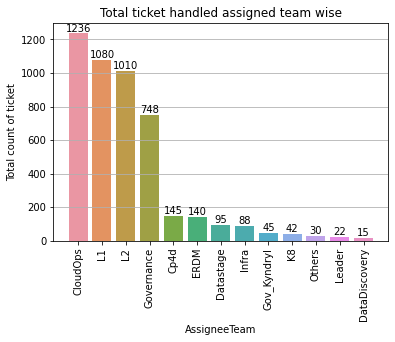

In [23]:
# Total ticket handled assigned team wise

orderIndxAsgn=df_ticket.AssigneeTeam.value_counts().index
valCnt_dfAsgn=df_ticket.AssigneeTeam.value_counts()
print(valCnt_dfAsgn)

sns.countplot(x=df_ticket.AssigneeTeam,order=orderIndxAsgn)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.ylabel('Total count of ticket')
plt.title('Total ticket handled assigned team wise')
plt.plot()
for pos,val in enumerate(valCnt_dfAsgn):
    plt.text(pos,val,val,ha='center',va='bottom') 

Service Request with Approvals      44
Question                            88
Incident                           978
Service Request                   3586
Name: Issue_Type, dtype: int64


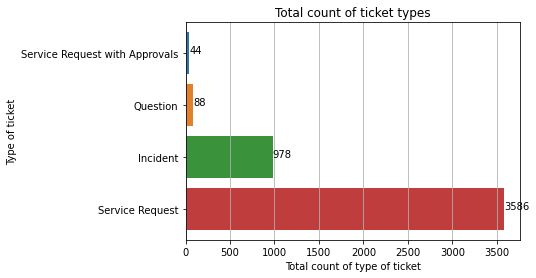

In [24]:
# Visualization of Total ticket count, ticket types wise

orderIndxIssTyp=df_ticket['Issue_Type'].value_counts(ascending=True).index
valCnt_dfIssTyp=df_ticket['Issue_Type'].value_counts(ascending=True)
print(valCnt_dfIssTyp)

sns.countplot(y=df_ticket['Issue_Type'],order=orderIndxIssTyp)
plt.grid(axis='x')
plt.xlabel('Total count of type of ticket')
plt.ylabel('Type of ticket')
plt.title('Total count of ticket types')
plt.plot()
for pos,val in enumerate(valCnt_dfIssTyp):
    plt.text(val,pos,val) 

In [25]:
df_ticket=df_ticket[~(df_ticket.AssigneeTeam=='Leader')]

## Visualization of Resolution Time some aspects of ticket wise 

In [26]:
# Dropping records where resolved date is missing becase missing resolved data will cause issue in processing for Resolution time analysis

df_tcktReso=df_ticket.dropna(subset=['Resolved'])
df_tcktReso.isnull().sum()

Summary                  0
Issue_Type               0
Status                   0
Priority                 0
Component/s              0
Labels                   0
Description              0
Created                  0
Resolved                 0
NPS_Rate              3318
NPS_Rating_Comment    4573
AssigneeTeam             0
dtype: int64

In [27]:
df_tcktReso.head(2)

,Summary,Issue_Type,Status,Priority,Component/s,Labels,Description,Created,Resolved,NPS_Rate,NPS_Rating_Comment,AssigneeTeam
0,Cirrus CDO prod and test DataStage needs valid...,Service Request,Closed,Low,DataStage Access Request,Access,Background:\r\n\r\nData movement calls DataSta...,23/Mar/21 11:27 PM,29/Mar/21 7:06 PM,NaN,NaN,Datastage
1,New project on Cirrus for mna-contract-harvesting,Service Request,Closed,Lowest,Other Access Request,Access,M&A Contract Harvesting is an existing CDO M&A...,23/Mar/21 10:20 PM,25/Mar/21 1:29 AM,NaN,NaN,L1


In [28]:
# Calculating Resolution Time

df_tcktReso['Resolution_Time(day)']=pd.to_datetime(df_tcktReso.Resolved)-pd.to_datetime(df_tcktReso.Created)  
print(df_tcktReso['Resolution_Time(day)'])

# Transforming resolution time in a continuous numerical form (here done in days) 

df_tcktReso['Resolution_Time(day)']=df_tcktReso['Resolution_Time(day)'].dt.days+df_tcktReso['Resolution_Time(day)'].dt.seconds/3600/24   
df_tcktReso['Resolution_Time(day)'].head(5)

0       5 days 19:39:00
1       1 days 03:09:00
2      16 days 10:59:00
3       1 days 17:02:00
4       0 days 00:25:00
             ...       
4691    0 days 19:19:00
4692    0 days 03:29:00
4693    3 days 10:41:00
4694    0 days 21:52:00
4695   28 days 01:03:00
Name: Resolution_Time(day), Length: 4648, dtype: timedelta64[ns]


C:\Users\KrishnenduGhorui\AppData\Local\Temp\ipykernel_6580\2105755453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tcktReso['Resolution_Time(day)']=pd.to_datetime(df_tcktReso.Resolved)-pd.to_datetime(df_tcktReso.Created)
C:\Users\KrishnenduGhorui\AppData\Local\Temp\ipykernel_6580\2105755453.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tcktReso['Resolution_Time(day)']=df_tcktReso['Resolution_Time(day)'].dt.days+df_tcktReso['Resolution_Time(day)'].dt.seconds/3600/24


0     5.818750
1     1.131250
2    16.457639
3     1.709722
4     0.017361
Name: Resolution_Time(day), dtype: float64

[]

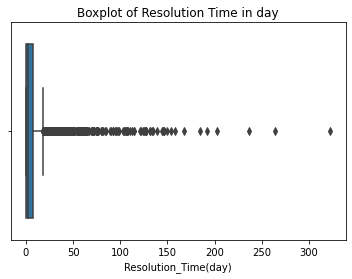

In [29]:
sns.boxplot(x=df_tcktReso['Resolution_Time(day)'])
plt.title('Boxplot of Resolution Time in day')
plt.plot()

In [30]:
# Ignoring tickets,those took more than 90 days for resolution,generally much time taken for some special reason

df_tcktReso=df_tcktReso[df_tcktReso['Resolution_Time(day)']<=90]

[]

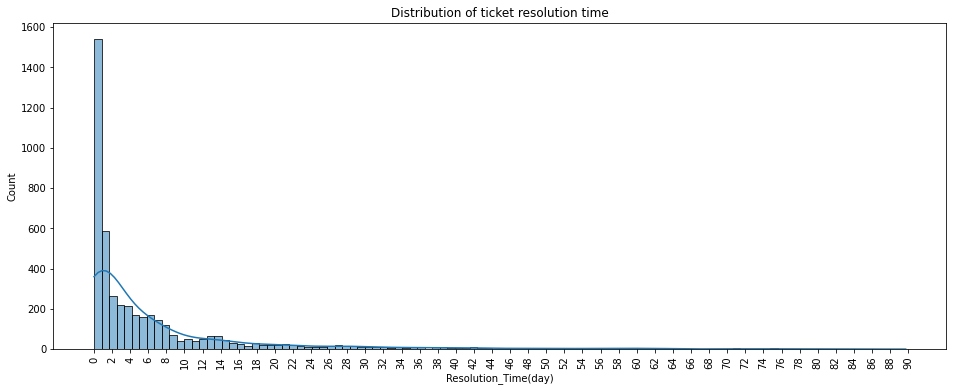

In [31]:
plt.figure(figsize=(16,6))
sns.histplot(df_tcktReso['Resolution_Time(day)'],kde=True)
plt.xticks(range(0,91,2),rotation=90)
plt.title('Distribution of ticket resolution time')
plt.plot()

##### Above distribution shows that most of the tickets resolved within 1-2 days and very few tickets only took more than 2 weeks to be resolved

[]

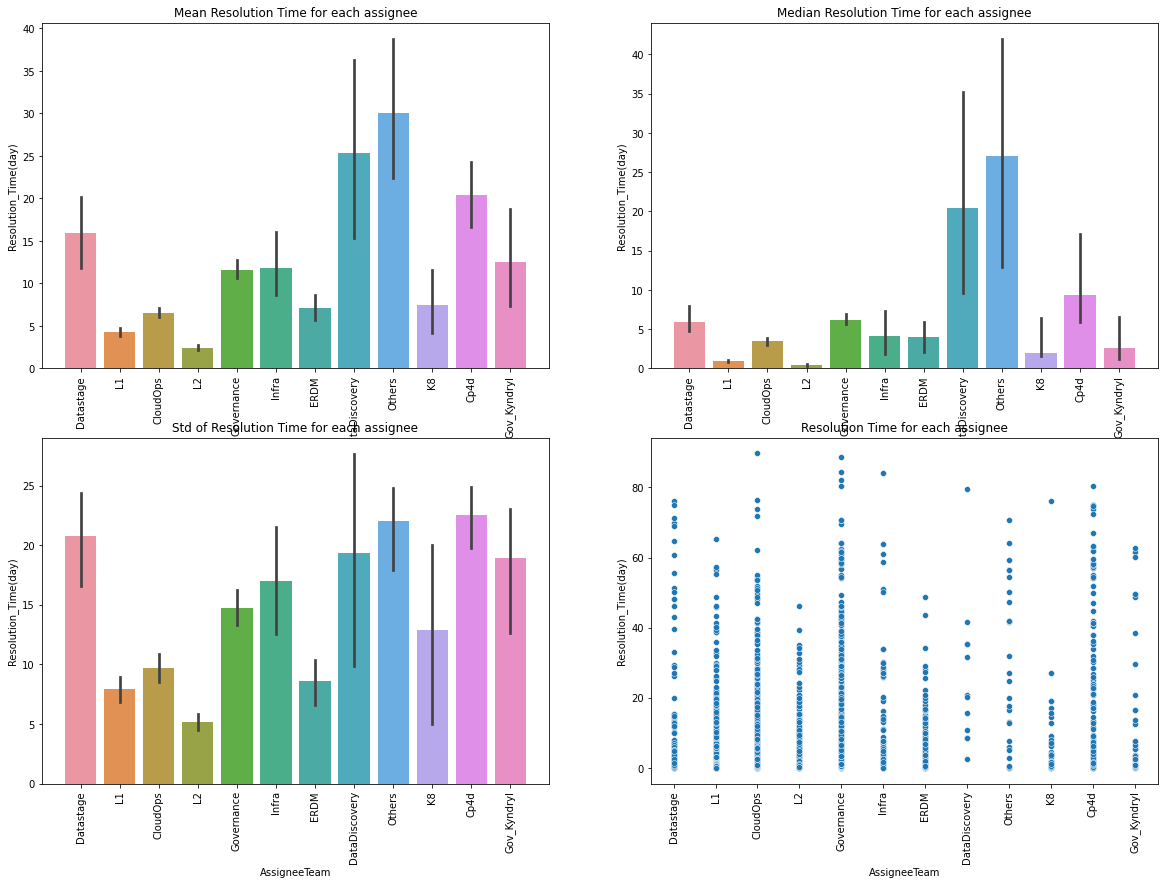

In [32]:
# Resolution Time, Assignee wise 

plt.figure(figsize=(20,14))
plt.subplot(2,2,1)
sns.barplot(x=df_tcktReso.AssigneeTeam,y=df_tcktReso['Resolution_Time(day)'])
plt.xticks(rotation=90)
plt.title('Mean Resolution Time for each assignee')
plt.plot()

plt.subplot(2,2,2)
sns.barplot(x=df_tcktReso.AssigneeTeam,y=df_tcktReso['Resolution_Time(day)'],estimator=np.median)
plt.xticks(rotation=90)
plt.title('Median Resolution Time for each assignee')
plt.plot()

plt.subplot(2,2,3)
sns.barplot(x=df_tcktReso.AssigneeTeam,y=df_tcktReso['Resolution_Time(day)'],estimator=np.std)
plt.xticks(rotation=90)
plt.title('Std of Resolution Time for each assignee')
plt.plot()

plt.subplot(2,2,4)
sns.scatterplot(x=df_tcktReso.AssigneeTeam,y=df_tcktReso['Resolution_Time(day)'])
plt.xticks(rotation=90)
plt.title('Resolution Time for each assignee')
plt.plot()

##### First plot shows that DataDiscovery,Others,Cp4d and Datastage team having more resolution time,
##### Fourth plot shows, Governance team also taking more time to resolve for a good number of ticket.

##### So it is required to check with those team ,why it is taking more time to resolve issue.
##### If it is because of less man power, then hiring would be done depending on project budget or responsibilty transformation may be done.

[]

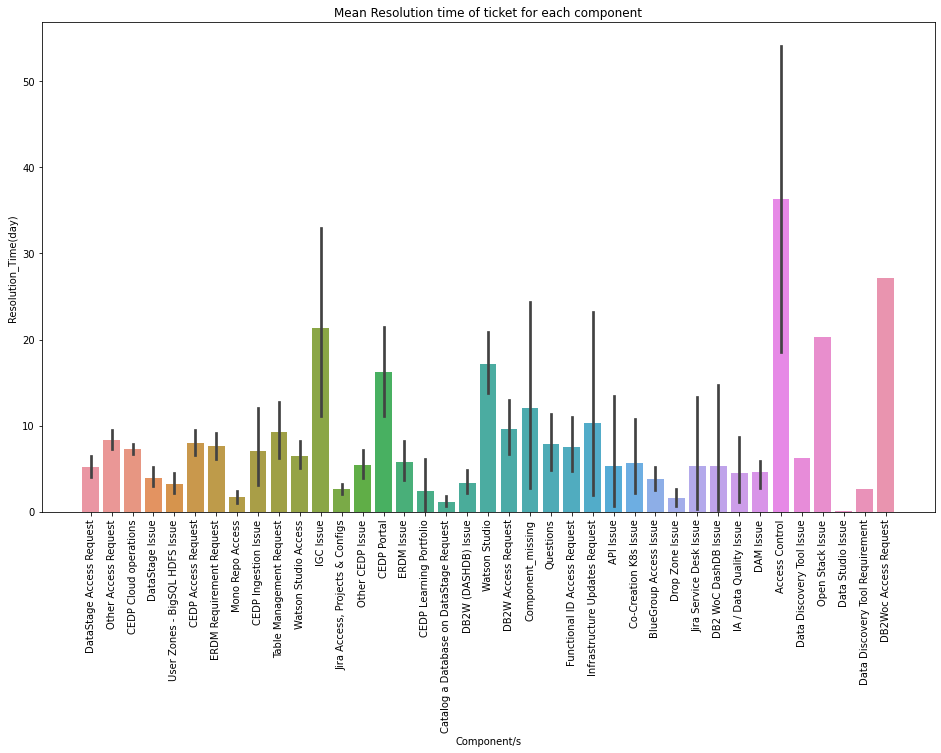

In [33]:
# Resolution Time, ticket Component/s wise

plt.figure(figsize=(16,9))
sns.barplot(x=df_tcktReso['Component/s'],y=df_tcktReso['Resolution_Time(day)'])
plt.title('Mean Resolution time of ticket for each component')
plt.xticks(rotation=90)
plt.plot()

##### Above plot shows 'Access Control','Db2Woc Access','Open stack', 'IGC issue','Watson Studio' and 'CEDP portal' related ticket taking more time to be resolved.
##### so, it's necessary to check why this type of issue taking more time 

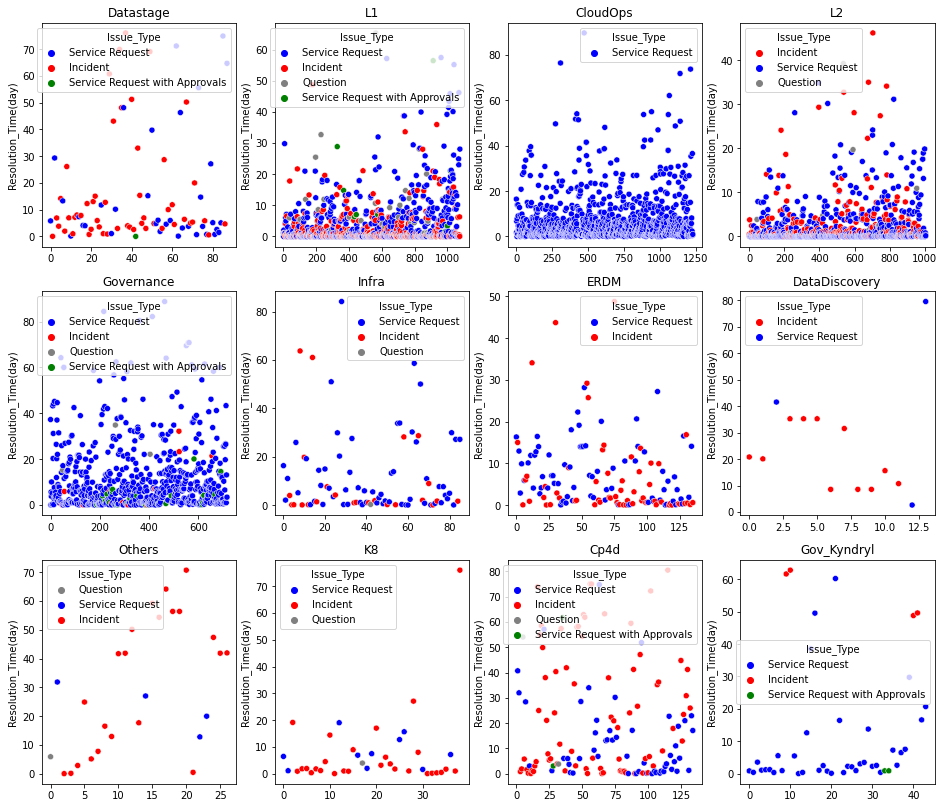

In [34]:
# Scatter plot of resolution time for each assigned team 


AssigneeTeamName=list(df_tcktReso.AssigneeTeam.unique())
plt.figure(figsize=(16,14))
for team in AssigneeTeamName:
    df_dummy=df_tcktReso[df_tcktReso.AssigneeTeam==team].reset_index()
    plt.subplot(3,4,AssigneeTeamName.index(team)+1)
    sns.scatterplot(x=df_dummy.index,y=df_dummy['Resolution_Time(day)'],hue=df_dummy['Issue_Type'],palette={'Service Request':'blue','Incident':'red','Service Request with Approvals':'green','Question':'grey'})
    plt.title(team)
    plt.plot()

## Analyzing NPS rating provided by customer for ticket resolution 

In [35]:
# Calculating the percentage of users providing NPS 

count_nps_notPrvd=df_ticket['NPS_Rate'].isnull().sum()
count_nps_Prvd=df_ticket.shape[0]-count_nps_notPrvd
print('Count ticket for which NPS Provided : ',count_nps_Prvd)
print('Count ticket for which NPS not Provided :',count_nps_notPrvd)
print('Percentage of ticket for which NPS Provided : ',(1-df_ticket['NPS_Rate'].isnull().mean())*100,'%')

Count ticket for which NPS Provided :  1330
Count ticket for which NPS not Provided : 3344
Percentage of ticket for which NPS Provided :  28.455284552845526 %


[]

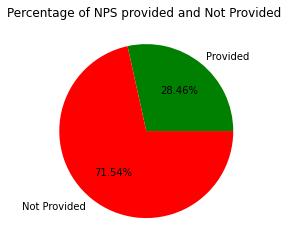

In [36]:
plt.pie([count_nps_Prvd,count_nps_notPrvd],labels=['Provided','Not Provided'],colors=['g','r'],autopct='%.2f%%')
plt.title('Percentage of NPS provided and Not Provided ')
plt.plot()

##### from above analysis , it is clear that most of customer not provding NPS, so some action to be taken to remind them to provide NPS for their ticket

In [37]:
# having a separate dataframe analysis only on NPS 
df_nps=df_tcktReso.copy()
df_nps.head(2)

,Summary,Issue_Type,Status,Priority,Component/s,Labels,Description,Created,Resolved,NPS_Rate,NPS_Rating_Comment,AssigneeTeam,Resolution_Time(day)
0,Cirrus CDO prod and test DataStage needs valid...,Service Request,Closed,Low,DataStage Access Request,Access,Background:\r\n\r\nData movement calls DataSta...,23/Mar/21 11:27 PM,29/Mar/21 7:06 PM,NaN,NaN,Datastage,5.81875
1,New project on Cirrus for mna-contract-harvesting,Service Request,Closed,Lowest,Other Access Request,Access,M&A Contract Harvesting is an existing CDO M&A...,23/Mar/21 10:20 PM,25/Mar/21 1:29 AM,NaN,NaN,L1,1.13125


In [38]:
df_nps['NPS_get_label']=df_nps['NPS_Rate'].isnull().map({True:'Not Provided',False:'Provided'})
df_nps.head()

,Summary,Issue_Type,Status,Priority,Component/s,Labels,Description,Created,Resolved,NPS_Rate,NPS_Rating_Comment,AssigneeTeam,Resolution_Time(day),NPS_get_label
0,Cirrus CDO prod and test DataStage needs valid...,Service Request,Closed,Low,DataStage Access Request,Access,Background:\r\n\r\nData movement calls DataSta...,23/Mar/21 11:27 PM,29/Mar/21 7:06 PM,NaN,NaN,Datastage,5.818750,Not Provided
1,New project on Cirrus for mna-contract-harvesting,Service Request,Closed,Lowest,Other Access Request,Access,M&A Contract Harvesting is an existing CDO M&A...,23/Mar/21 10:20 PM,25/Mar/21 1:29 AM,NaN,NaN,L1,1.131250,Not Provided
2,Unable to run SQL in C360 SQL Query Prod,Service Request,Closed,Lowest,CEDP Cloud operations,CloudOther,"Hi Team,\r\n\r\nI got the follow error when I ...",23/Mar/21 9:13 PM,09/Apr/21 8:12 AM,NaN,NaN,CloudOps,16.457639,Not Provided
3,Blue Fringe Setup for ECI Staging Cluster,Service Request,Closed,Lowest,CEDP Cloud operations,CloudOther,I need the following rules to be applied to ac...,23/Mar/21 8:08 PM,25/Mar/21 1:10 PM,NaN,NaN,CloudOps,1.709722,Not Provided
4,Unable to connect to cedp authorization failed...,Service Request,Closed,Lowest,Other Access Request,User_to_Resolve,I find I am unable to connect to CEDP - gettin...,23/Mar/21 7:39 PM,23/Mar/21 8:04 PM,10.0,NaN,L1,0.017361,Provided


[]

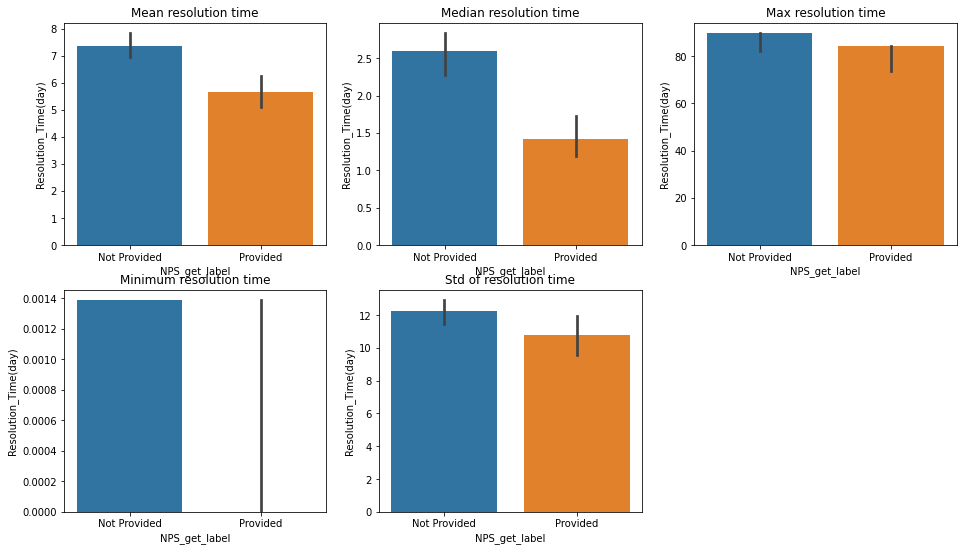

In [39]:
plt.figure(figsize=(16,9))
plt.subplot(2,3,1)
sns.barplot(x='NPS_get_label',y='Resolution_Time(day)',data=df_nps,estimator=np.mean)
plt.title('Mean resolution time')

plt.subplot(2,3,2)
sns.barplot(x='NPS_get_label',y='Resolution_Time(day)',data=df_nps,estimator=np.median)
plt.title('Median resolution time')

plt.subplot(2,3,3)
sns.barplot(x='NPS_get_label',y='Resolution_Time(day)',data=df_nps,estimator=np.max)
plt.title('Max resolution time')

plt.subplot(2,3,4)
sns.barplot(x='NPS_get_label',y='Resolution_Time(day)',data=df_nps,estimator=np.min)
plt.title('Minimum resolution time')

plt.subplot(2,3,5)
sns.barplot(x='NPS_get_label',y='Resolution_Time(day)',data=df_nps,estimator=np.std)
plt.title('Std of resolution time')
plt.plot()

##### From above visualization, it is clear that overall resolution time is more for ticket for which NPS not provided than that of provided. So, we can't estimate like who didn't provide seems to not provide because of over satisfaction from resolution time aspect from realizing that no point to improve or report anything there in support team.  

So, we need to dig out more why they are not providing NPS

[]

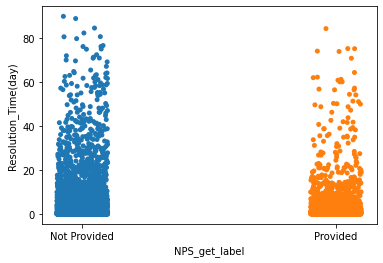

In [40]:
sns.stripplot(x='NPS_get_label',y='Resolution_Time(day)',data=df_nps)
plt.plot()

[]

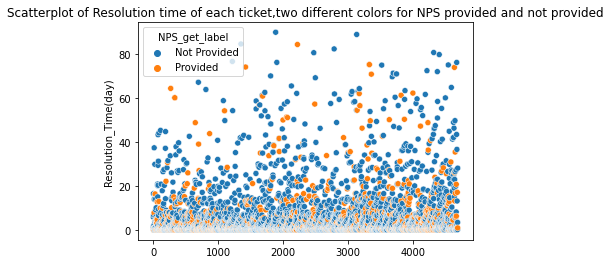

In [41]:
sns.scatterplot(x=df_nps.index,y=df_nps['Resolution_Time(day)'],hue=df_nps.NPS_get_label)
plt.title('Scatterplot of Resolution time of each ticket,two different colors for NPS provided and not provided')
plt.plot()

In [42]:
# Getting a new column with Resolution time range value

bin_resolutionTime=[0,1,2,3,7,14,21,28,35,42,49,56,63,70,77,84,90]
df_nps['Resolution_Time_range']=pd.cut(df_nps['Resolution_Time(day)'],bins=bin_resolutionTime)
df_nps.head()

,Summary,Issue_Type,Status,Priority,Component/s,Labels,Description,Created,Resolved,NPS_Rate,NPS_Rating_Comment,AssigneeTeam,Resolution_Time(day),NPS_get_label,Resolution_Time_range
0,Cirrus CDO prod and test DataStage needs valid...,Service Request,Closed,Low,DataStage Access Request,Access,Background:\r\n\r\nData movement calls DataSta...,23/Mar/21 11:27 PM,29/Mar/21 7:06 PM,NaN,NaN,Datastage,5.818750,Not Provided,"(3, 7]"
1,New project on Cirrus for mna-contract-harvesting,Service Request,Closed,Lowest,Other Access Request,Access,M&A Contract Harvesting is an existing CDO M&A...,23/Mar/21 10:20 PM,25/Mar/21 1:29 AM,NaN,NaN,L1,1.131250,Not Provided,"(1, 2]"
2,Unable to run SQL in C360 SQL Query Prod,Service Request,Closed,Lowest,CEDP Cloud operations,CloudOther,"Hi Team,\r\n\r\nI got the follow error when I ...",23/Mar/21 9:13 PM,09/Apr/21 8:12 AM,NaN,NaN,CloudOps,16.457639,Not Provided,"(14, 21]"
3,Blue Fringe Setup for ECI Staging Cluster,Service Request,Closed,Lowest,CEDP Cloud operations,CloudOther,I need the following rules to be applied to ac...,23/Mar/21 8:08 PM,25/Mar/21 1:10 PM,NaN,NaN,CloudOps,1.709722,Not Provided,"(1, 2]"
4,Unable to connect to cedp authorization failed...,Service Request,Closed,Lowest,Other Access Request,User_to_Resolve,I find I am unable to connect to CEDP - gettin...,23/Mar/21 7:39 PM,23/Mar/21 8:04 PM,10.0,NaN,L1,0.017361,Provided,"(0, 1]"


[]

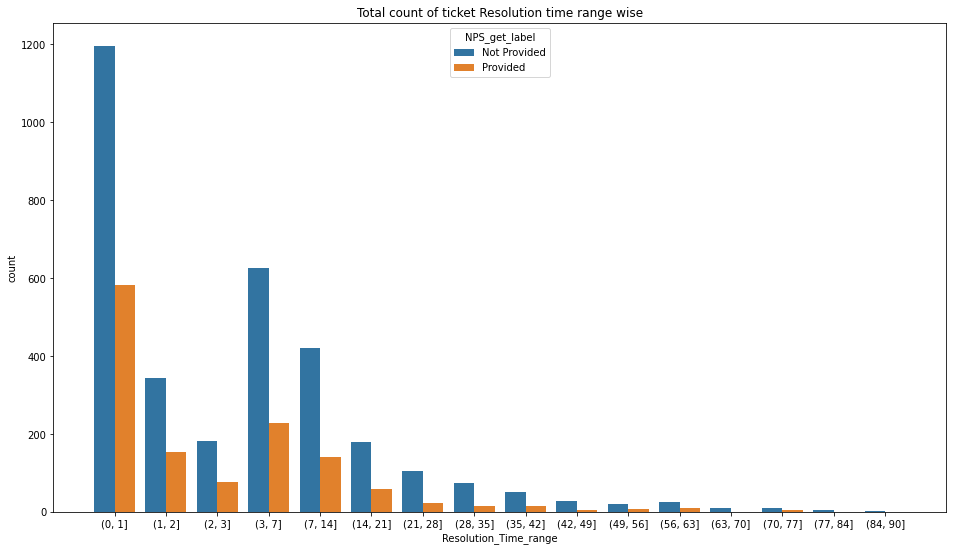

In [43]:
plt.figure(figsize=(16,9))
sns.countplot(x=df_nps.Resolution_Time_range,hue=df_nps.NPS_get_label)
plt.title('Total count of ticket Resolution time range wise')
plt.plot()

##### From above diagrams, it is observed that for less resolution time also NPS not provided for more ticket than that of NPS provided tickets.  
##### So, over satisfaction for less resolution time may not be reason of not providing NPS 

In [44]:
# Getting a dataframe 'df_npsRt' with record only having NPS rating provided

df_npsRt=df_nps.dropna(subset=['NPS_Rate'])
df_npsRt.head()

,Summary,Issue_Type,Status,Priority,Component/s,Labels,Description,Created,Resolved,NPS_Rate,NPS_Rating_Comment,AssigneeTeam,Resolution_Time(day),NPS_get_label,Resolution_Time_range
4,Unable to connect to cedp authorization failed...,Service Request,Closed,Lowest,Other Access Request,User_to_Resolve,I find I am unable to connect to CEDP - gettin...,23/Mar/21 7:39 PM,23/Mar/21 8:04 PM,10.0,NaN,L1,0.017361,Provided,"(0, 1]"
11,Create a DB2 Flex option on the public cloud f...,Service Request,Closed,Lowest,CEDP Cloud operations,CloudOther,GSI Transformation wants to improve performanc...,23/Mar/21 1:36 PM,31/Mar/21 8:38 AM,10.0,NaN,CloudOps,7.793056,Provided,"(7, 14]"
12,Can't Generate/Validate SQL Statements in DB2 ...,Incident,Closed,Medium,DataStage Issue,DataStage,"Hello, \r\nI and my team get this error when w...",23/Mar/21 1:28 PM,23/Mar/21 3:16 PM,10.0,NaN,L2,0.075000,Provided,"(0, 1]"
17,BlueFringe configuration for os-cedp-platform,Service Request,Closed,Lowest,CEDP Cloud operations,CloudOther,"Hello Team,\r\n\r\nAdd the following IP addres...",23/Mar/21 10:34 AM,24/Mar/21 10:03 AM,10.0,NaN,CloudOps,0.978472,Provided,"(0, 1]"
21,Need to have access to Squirrel .,Service Request,Closed,Lowest,Other Access Request,Access,For client data analysis I need to get access ...,22/Mar/21 4:50 PM,23/Mar/21 4:44 PM,8.0,NaN,L1,0.995833,Provided,"(0, 1]"


In [45]:
valCount_NPS=df_npsRt['NPS_Rate'].value_counts().sort_index()
valCount_NPS

0.0      12
1.0       2
2.0       5
3.0       3
4.0       6
5.0      25
6.0       7
7.0      20
8.0     115
9.0     239
10.0    890
Name: NPS_Rate, dtype: int64

In [46]:
df_npsRt['NPS_Rate']=df_npsRt['NPS_Rate'].astype('int')
df_npsRt['NPS_Rate'].dtype

C:\Users\KrishnenduGhorui\AppData\Local\Temp\ipykernel_6580\3182601562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_npsRt['NPS_Rate']=df_npsRt['NPS_Rate'].astype('int')


dtype('int32')

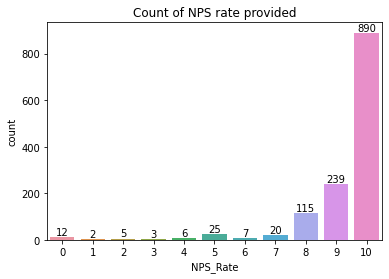

In [47]:
# Count of NPS Rate 

sns.countplot(x=df_npsRt['NPS_Rate'])
plt.title('Count of NPS rate provided')
for i in range(11):
    plt.text(i,valCount_NPS[i],valCount_NPS[i],va='bottom',ha='center')

##### From above plot, it is observed that count of NPS rating 8,9,10 are provided more than less NPS rating, so overall support performance is good. 

## Finding insight of NPS rating provided 

In [48]:
# Creating a new column for labeling the NPS rating provided, like NPS rating 0-6 as 'Detractor',7-8 as 'Passive',9-10 as 'Promoter'

df_npsRt['NPS_Rating_Label']=pd.Series([])
dict_npsRtLbl={0:'Detractor',1:'Detractor',2:'Detractor',3:'Detractor',4:'Detractor',5:'Detractor',6:'Detractor',7:'Passive',8:'Passive',9:'Promoter',10:'Promoter'}
df_npsRt['NPS_Rating_Label']=df_npsRt['NPS_Rate'].map(dict_npsRtLbl)
df_npsRt.head(10)

C:\Users\KrishnenduGhorui\AppData\Local\Temp\ipykernel_6580\1052725819.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_npsRt['NPS_Rating_Label']=pd.Series([])
C:\Users\KrishnenduGhorui\AppData\Local\Temp\ipykernel_6580\1052725819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_npsRt['NPS_Rating_Label']=pd.Series([])
C:\Users\KrishnenduGhorui\AppData\Local\Temp\ipykernel_6580\1052725819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,Summary,Issue_Type,Status,Priority,Component/s,Labels,Description,Created,Resolved,NPS_Rate,NPS_Rating_Comment,AssigneeTeam,Resolution_Time(day),NPS_get_label,Resolution_Time_range,NPS_Rating_Label
4,Unable to connect to cedp authorization failed...,Service Request,Closed,Lowest,Other Access Request,User_to_Resolve,I find I am unable to connect to CEDP - gettin...,23/Mar/21 7:39 PM,23/Mar/21 8:04 PM,10,NaN,L1,0.017361,Provided,"(0, 1]",Promoter
11,Create a DB2 Flex option on the public cloud f...,Service Request,Closed,Lowest,CEDP Cloud operations,CloudOther,GSI Transformation wants to improve performanc...,23/Mar/21 1:36 PM,31/Mar/21 8:38 AM,10,NaN,CloudOps,7.793056,Provided,"(7, 14]",Promoter
12,Can't Generate/Validate SQL Statements in DB2 ...,Incident,Closed,Medium,DataStage Issue,DataStage,"Hello, \r\nI and my team get this error when w...",23/Mar/21 1:28 PM,23/Mar/21 3:16 PM,10,NaN,L2,0.075000,Provided,"(0, 1]",Promoter
17,BlueFringe configuration for os-cedp-platform,Service Request,Closed,Lowest,CEDP Cloud operations,CloudOther,"Hello Team,\r\n\r\nAdd the following IP addres...",23/Mar/21 10:34 AM,24/Mar/21 10:03 AM,10,NaN,CloudOps,0.978472,Provided,"(0, 1]",Promoter
21,Need to have access to Squirrel .,Service Request,Closed,Lowest,Other Access Request,Access,For client data analysis I need to get access ...,22/Mar/21 4:50 PM,23/Mar/21 4:44 PM,8,NaN,L1,0.995833,Provided,"(0, 1]",Passive
27,Create a new table for CMR Segmentation Type a...,Service Request,Closed,Lowest,ERDM Requirement Request,ERDM,NonProvided,22/Mar/21 12:03 PM,07/Apr/21 7:44 PM,10,NaN,ERDM,16.320139,Provided,"(14, 21]",Promoter
39,New Access,Service Request,Closed,Lowest,CEDP Cloud operations,CloudOther,The resource name is cedp-cloud-ml (OpenShift)...,19/Mar/21 6:41 PM,24/Mar/21 10:55 AM,10,NaN,CloudOps,4.676389,Provided,"(3, 7]",Promoter
46,Access to Watson Studio 2.1,Service Request,Closed,Lowest,Watson Studio Access,Access,As a data scientist working in Market Developm...,19/Mar/21 2:33 PM,19/Mar/21 2:42 PM,9,NaN,L2,0.006250,Provided,"(0, 1]",Promoter
50,Please delete several corrupted IG Rule records,Incident,Closed,Medium,IGC Issue,IGC,"Hello,We have again the issue with disconnecte...",19/Mar/21 10:59 AM,19/Mar/21 12:11 PM,10,NaN,Datastage,0.050000,Provided,"(0, 1]",Promoter
54,New User Request,Service Request,Closed,Lowest,CEDP Cloud operations,CloudOther,I require developer access to the Client 360 K...,19/Mar/21 9:36 AM,22/Mar/21 12:44 PM,10,NaN,CloudOps,3.130556,Provided,"(3, 7]",Promoter


[]

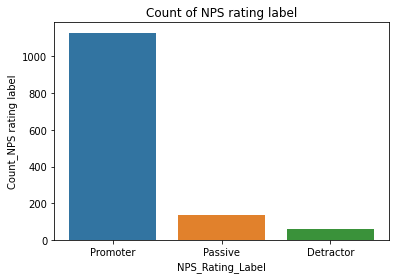

In [49]:
sns.countplot(x=df_npsRt.NPS_Rating_Label)
plt.title('Count of NPS rating label')
plt.ylabel('Count_NPS rating label')
plt.plot()

##### Above chart shows that Promoter NPS is much more than others, and Passive also more than detractor. So performance of Support team is very good

In [50]:
# Having a dataframe with count of ticket, categorised by 'AssigneeTeam' and 'NPS_Rating_Label'

df_npsRt_GrpByASSnNpsLbl=df_npsRt.groupby(['AssigneeTeam','NPS_Rating_Label']).count()
df_npsRt_GrpByASSnNpsLbl

Summary  Issue_Type  Status  Priority  \
AssigneeTeam NPS_Rating_Label                                          
CloudOps     Detractor               9           9       9         9   
             Passive                14          14      14        14   
             Promoter              243         243     243       243   
Cp4d         Detractor               1           1       1         1   
             Passive                 4           4       4         4   
             Promoter               43          43      43        43   
Datastage    Detractor               4           4       4         4   
             Passive                 6           6       6         6   
             Promoter               14          14      14        14   
ERDM         Detractor               1           1       1         1   
             Promoter               42          42      42        42   
Gov_Kyndryl  Detractor               1           1       1         1   
             Passive                 3           3       3         3   
             Promoter               15          15      15        15   
Governance   Detractor              12          12      12        12   
             Passive                27          27      27        27   
             Promoter              171         171     171       171   
Infra        Detractor               1           1       1         1   
             Passive                 2           2       2         2   
             Promoter               16          16      16        16   
K8           Detractor               1           1       1         1   
             Passive                 2           2       2         2   
             Promoter                9           9       9         9   
L1           Detractor              18          18      18        18   
             Passive                37          37      37        37   
             Promoter              260         260     260       260   
L2           Detractor              12          12      12        12   
             Passive                40          40      40        40   
             Promoter              309         309     309       309   
Others       Promoter                7           7       7         7   

                               Component/s  Labels  Description  Created  \
AssigneeTeam NPS_Rating_Label                                              
CloudOps     Detractor                   9       9            9        9   
             Passive                    14      14           14       14   
             Promoter                  243     243          243      243   
Cp4d         Detractor                   1       1            1        1   
             Passive                     4       4            4        4   
             Promoter                   43      43           43       43   
Datastage    Detractor                   4       4            4        4   
             Passive                     6       6            6        6   
             Promoter                   14      14           14       14   
ERDM         Detractor                   1       1            1        1   
             Promoter                   42      42           42       42   
Gov_Kyndryl  Detractor                   1       1            1        1   
             Passive                     3       3            3        3   
             Promoter                   15      15           15       15   
Governance   Detractor                  12      12           12       12   
             Passive                    27      27           27       27   
             Promoter                  171     171          171      171   
Infra        Detractor                   1       1            1        1   
             Passive                     2       2            2        2   
             Promoter                   16      16           16       16   
K8           Detractor                   1       1    

In [51]:
df_npsRt_GrpByASSnNpsLbl.loc[df_npsRt_GrpByASSnNpsLbl.index[1]]['Summary']

14

In [52]:
# Getting AssigneeTeam names from groupby object in order it is in object

AssigneeList=list(np.unique(list(df_npsRt_GrpByASSnNpsLbl.index.get_level_values(0))))
AssigneeList

['CloudOps',
 'Cp4d',
 'Datastage',
 'ERDM',
 'Gov_Kyndryl',
 'Governance',
 'Infra',
 'K8',
 'L1',
 'L2',
 'Others']

[]

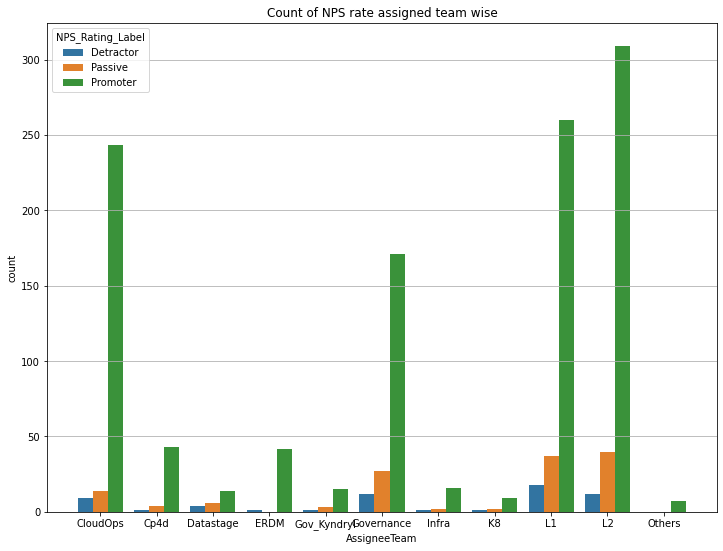

In [53]:
plt.figure(figsize=(12,9))
sns.countplot(x=df_npsRt['AssigneeTeam'],hue=df_npsRt['NPS_Rating_Label'],hue_order=['Detractor','Passive','Promoter'],order=AssigneeList)   #,color={'Passive':'y','Promoter':'g','Detractor':'r'}
#plt.xticks(ticks=AssigneeLista)
plt.title('Count of NPS rate assigned team wise')
plt.grid(axis='y')
plt.plot()

### Finding out relation between ticket resolution time and NPS rating provided by user for that ticket 

[]

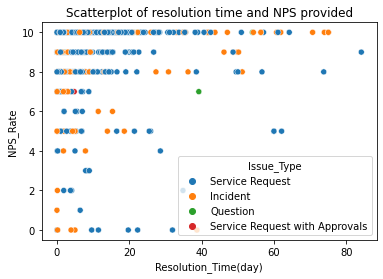

In [54]:
# Resolution time vs NPS 

sns.scatterplot(x=df_npsRt['Resolution_Time(day)'],y=df_npsRt['NPS_Rate'],hue=df_npsRt['Issue_Type'])     
plt.title('Scatterplot of resolution time and NPS provided')
plt.plot()

##### Above plot also shows that mostly 8,9,10 NPS rating provided. 

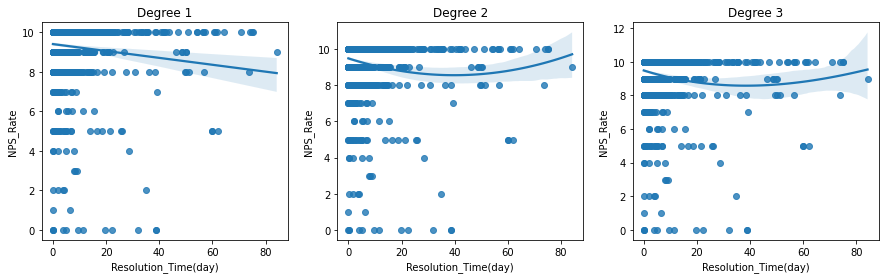

In [55]:
# Visialization of regression line for NPS vs Resolution time (although NPS is not contineous ,still just to see how it relate assuming NPS as contineous)

plt.figure(figsize=(15,4))
for i in range(1,4):
    plt.subplot(1,3,i)
    sns.regplot(x=df_npsRt['Resolution_Time(day)'],y=df_npsRt['NPS_Rate'],order=i)
    plt.title('Degree '+str(i))
    plt.plot()

##### Not good generalised regression plot came up

In [56]:
# Getting correlation between Resolution Time and NPS Rate provided

print('Linear corelation - ',scipy.stats.pearsonr(df_npsRt['Resolution_Time(day)'],df_npsRt['NPS_Rate']))
print('Non-linear monotonic correlation - ',scipy.stats.spearmanr(df_npsRt['Resolution_Time(day)'],df_npsRt['NPS_Rate']))

Linear corelation -  (-0.12432324560817296, 5.704225824741187e-06)
Non-linear monotonic correlation -  SpearmanrResult(correlation=-0.1402208463031495, pvalue=3.0119405919789185e-07)


##### It is observed that correlation is not that much strong , negative, so more resolution time ,less NPS rating ,but not that much strong 

In [57]:
# Having a dataframe with count of ticket, categorised by ''Resolution_Time_range' and 'NPS_Rating_Label'

df_npsRtGrpByRsltnTmRnNpsLbl=df_npsRt.groupby(['Resolution_Time_range','NPS_Rating_Label']).count()
df_npsRtGrpByRsltnTmRnNpsLbl

Summary  Issue_Type  Status  Priority  \
Resolution_Time_range NPS_Rating_Label                                          
(0, 1]                Detractor              11          11      11        11   
                      Passive                44          44      44        44   
                      Promoter              527         527     527       527   
(1, 2]                Detractor               7           7       7         7   
                      Passive                16          16      16        16   
                      Promoter              131         131     131       131   
(2, 3]                Detractor               2           2       2         2   
                      Passive                13          13      13        13   
                      Promoter               62          62      62        62   
(3, 7]                Detractor              15          15      15        15   
                      Passive                24          24      24        24   
                      Promoter              188         188     188       188   
(7, 14]               Detractor               9           9       9         9   
                      Passive                22          22      22        22   
                      Promoter              110         110     110       110   
(14, 21]              Detractor               4           4       4         4   
                      Passive                 5           5       5         5   
                      Promoter               50          50      50        50   
(21, 28]              Detractor               4           4       4         4   
                      Passive                 2           2       2         2   
                      Promoter               17          17      17        17   
(28, 35]              Detractor               3           3       3         3   
                      Passive                 1           1       1         1   
                      Promoter               10          10      10        10   
(35, 42]              Detractor               2           2       2         2   
                      Passive                 3           3       3         3   
                      Promoter               10          10      10        10   
(42, 49]              Detractor               0           0       0         0   
                      Passive                 0           0       0         0   
                      Promoter                6           6       6         6   
(49, 56]              Detractor               0           0       0         0   
                      Passive                 3           3       3         3   
                      Promoter                5           5       5         5   
(56, 63]              Detractor               3           3       3         3   
                      Passive                 1           1       1         1   
                      Promoter                6           6       6         6   
(63, 70]              Detractor               0           0       0         0   
                      Passive                 0           0       0         0   
                      Promoter                1           1       1         1   
(70, 77]              Detractor               0           0       0         0   
                      Passive                 1           1       1         1   
                      Promoter                4           4       4         4   
(77, 84]              Detractor               0           0       0         0   
                      Passive                 0           0       0         0   
                      Promoter                0           0       0         0   
(84, 90]              Detractor               0           0       0         0   
                      Passive                 0           0       0         0   
                      Promoter                1           1       1    

##### Here summary column contains count of ticket specific to category of corresponding index resolution time range and NPS_Rating_Label, like ticket count for resolution time range (0-1) and NPS_Rating_Label 'Detractor' is 9.
Summary column is considered instead of other available column, because each ticket must have a summary,summary can't be blanked, so count can't be missed

If it is seen for some cases, summary column has nan value, that means there is no ticket for that resolution time range and NPS rate label , So, nan value can be replaced by 0

In [58]:
#df_npsRtCpyGrpByRsltnTmRnNpsLbl.Summary.fillna(0,inplace=True)
#df_npsRtCpyGrpByRsltnTmRnNpsLbl

In [59]:
df_npsRtGrpByRsltnTmRnNpsLbl.head(1)

,,Summary,Issue_Type,Status,Priority,Component/s,Labels,Description,Created,Resolved,NPS_Rate,NPS_Rating_Comment,AssigneeTeam,Resolution_Time(day),NPS_get_label
Resolution_Time_range,NPS_Rating_Label,,,,,,,,,,,,,,
"(0, 1]",Detractor,11,11,11,11,11,11,11,11,11,11,2,11,11,11


In [60]:
# new column created, this one is for percentage of ticket count of 'Detractor','Passive','Promoter', for each Resolution time range 

df_npsRtGrpByRsltnTmRnNpsLbl['CountPCT']=pd.Series([])

# Calculating percentage of ticket count of 'Detractor','Passive','Promoter', for each Resolution time range and placing in dataframe
for i in range(1,len(bin_resolutionTime)):
    total=df_npsRtGrpByRsltnTmRnNpsLbl.xs(bin_resolutionTime[i])['Summary'].sum()
    if total==0:
        total=1
    df_npsRtGrpByRsltnTmRnNpsLbl.loc[bin_resolutionTime[i],'CountPCT']=list(df_npsRtGrpByRsltnTmRnNpsLbl.xs(bin_resolutionTime[i])['Summary']/total)

df_npsRtGrpByRsltnTmRnNpsLbl

C:\Users\KrishnenduGhorui\AppData\Local\Temp\ipykernel_6580\2141013579.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_npsRtGrpByRsltnTmRnNpsLbl['CountPCT']=pd.Series([])


Summary  Issue_Type  Status  Priority  \
Resolution_Time_range NPS_Rating_Label                                          
(0, 1]                Detractor              11          11      11        11   
                      Passive                44          44      44        44   
                      Promoter              527         527     527       527   
(1, 2]                Detractor               7           7       7         7   
                      Passive                16          16      16        16   
                      Promoter              131         131     131       131   
(2, 3]                Detractor               2           2       2         2   
                      Passive                13          13      13        13   
                      Promoter               62          62      62        62   
(3, 7]                Detractor              15          15      15        15   
                      Passive                24          24      24        24   
                      Promoter              188         188     188       188   
(7, 14]               Detractor               9           9       9         9   
                      Passive                22          22      22        22   
                      Promoter              110         110     110       110   
(14, 21]              Detractor               4           4       4         4   
                      Passive                 5           5       5         5   
                      Promoter               50          50      50        50   
(21, 28]              Detractor               4           4       4         4   
                      Passive                 2           2       2         2   
                      Promoter               17          17      17        17   
(28, 35]              Detractor               3           3       3         3   
                      Passive                 1           1       1         1   
                      Promoter               10          10      10        10   
(35, 42]              Detractor               2           2       2         2   
                      Passive                 3           3       3         3   
                      Promoter               10          10      10        10   
(42, 49]              Detractor               0           0       0         0   
                      Passive                 0           0       0         0   
                      Promoter                6           6       6         6   
(49, 56]              Detractor               0           0       0         0   
                      Passive                 3           3       3         3   
                      Promoter                5           5       5         5   
(56, 63]              Detractor               3           3       3         3   
                      Passive                 1           1       1         1   
                      Promoter                6           6       6         6   
(63, 70]              Detractor               0           0       0         0   
                      Passive                 0           0       0         0   
                      Promoter                1           1       1         1   
(70, 77]              Detractor               0           0       0         0   
                      Passive                 1           1       1         1   
                      Promoter                4           4       4         4   
(77, 84]              Detractor               0           0       0         0   
                      Passive                 0           0       0         0   
                      Promoter                0           0       0         0   
(84, 90]              Detractor               0           0       0         0   
                      Passive                 0           0       0         0   
                      Promoter                1           1       1    

In [61]:
df_npsRtCntStat=df_npsRtGrpByRsltnTmRnNpsLbl[['Summary','CountPCT']].reset_index()   # reset index is necessary for text on barplot
df_npsRtCntStat.CountPCT=round(df_npsRtCntStat.CountPCT,3)  # df_npsRtCntStat is used to get CountPCT value for printing text on barplot
df_npsRtCntStat.rename(columns={'Summary':'Summary_count'},inplace=True)
print(df_npsRtCntStat)        

   Resolution_Time_range NPS_Rating_Label  Summary_count  CountPCT
0                 (0, 1]        Detractor             11     0.019
1                 (0, 1]          Passive             44     0.076
2                 (0, 1]         Promoter            527     0.905
3                 (1, 2]        Detractor              7     0.045
4                 (1, 2]          Passive             16     0.104
5                 (1, 2]         Promoter            131     0.851
6                 (2, 3]        Detractor              2     0.026
7                 (2, 3]          Passive             13     0.169
8                 (2, 3]         Promoter             62     0.805
9                 (3, 7]        Detractor             15     0.066
10                (3, 7]          Passive             24     0.106
11                (3, 7]         Promoter            188     0.828
12               (7, 14]        Detractor              9     0.064
13               (7, 14]          Passive             22     0

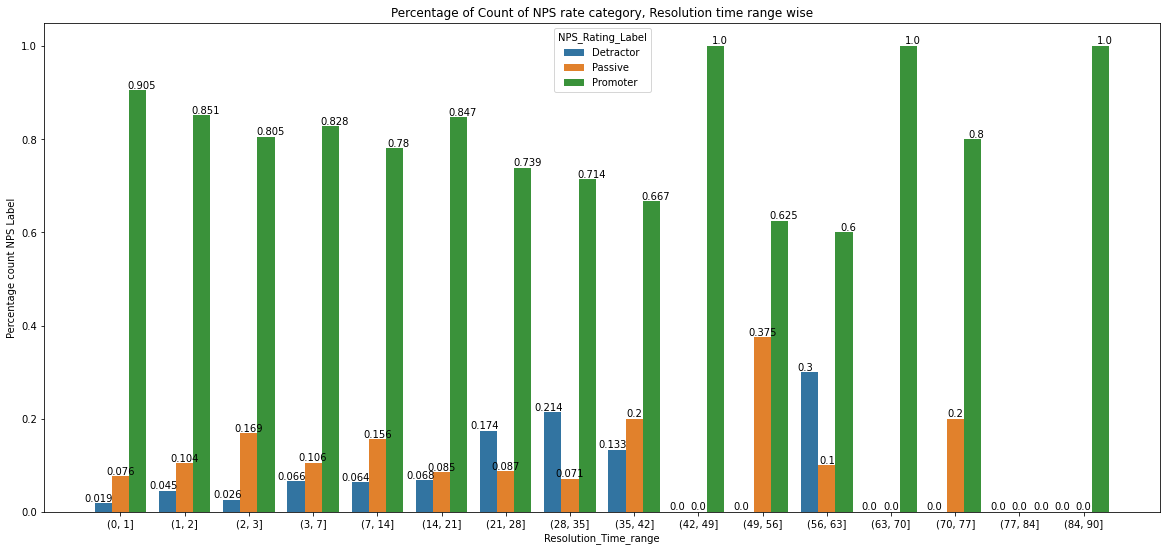

In [62]:
plt.figure(figsize=(20,9))
sns.barplot(x=df_npsRtCntStat.Resolution_Time_range,y=df_npsRtCntStat.CountPCT,hue=df_npsRtCntStat.NPS_Rating_Label)
plt.title('Percentage of Count of NPS rate category, Resolution time range wise')
plt.ylabel('Percentage count NPS Label')
plt.plot()
for i in range(len(df_npsRtCntStat.index)):
    plt.text(i/3-(1/3),df_npsRtCntStat.CountPCT[i],df_npsRtCntStat.CountPCT[i],ha='center',va='bottom')

In above diagram, it is observed that with increase of resolution time , percentage of NPS rate grade 'Promoter' decreases, on the other hand 'Detractor' and 'Passive' increases. 

So, it is proved that NPS rate decreases with more resolution time. 

In [63]:
count_tckt_grpByRsltTmNps=df_npsRtGrpByRsltnTmRnNpsLbl.Summary.values
count_tckt_grpByRsltTmNps

array([ 11,  44, 527,   7,  16, 131,   2,  13,  62,  15,  24, 188,   9,
        22, 110,   4,   5,  50,   4,   2,  17,   3,   1,  10,   2,   3,
        10,   0,   0,   6,   0,   3,   5,   3,   1,   6,   0,   0,   1,
         0,   1,   4,   0,   0,   0,   0,   0,   1], dtype=int64)

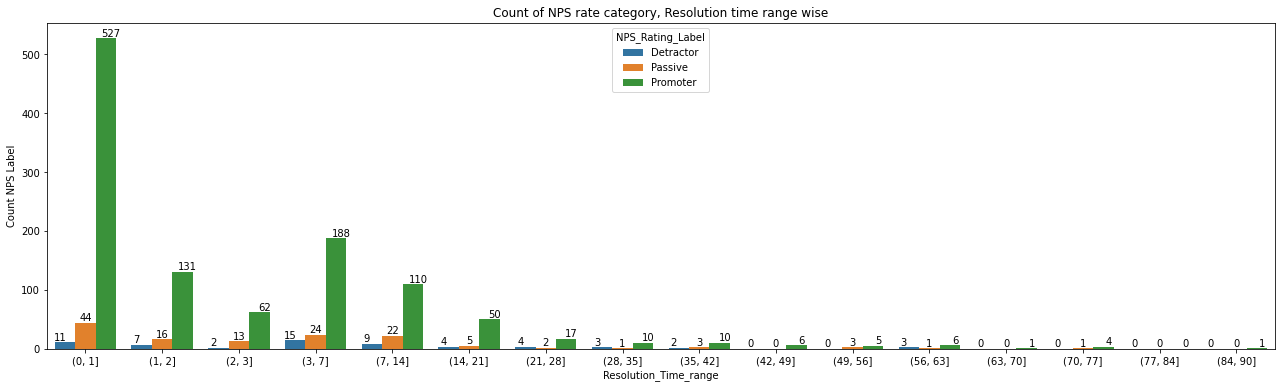

In [64]:
plt.figure(figsize=(22,6))
sns.countplot(x=df_npsRt.Resolution_Time_range,hue=df_npsRt.NPS_Rating_Label,hue_order=['Detractor','Passive','Promoter'])
plt.title('Count of NPS rate category, Resolution time range wise')
plt.ylabel('Count NPS Label')
for i in range(len(df_npsRtGrpByRsltnTmRnNpsLbl.index)):
    plt.text(i/3-(1/3),count_tckt_grpByRsltTmNps[i],count_tckt_grpByRsltTmNps[i],ha='center',va='bottom')

###### Visualization of correlation between fetures of ticket 

In [65]:
df_npsRt_corr=df_npsRt[['Issue_Type','AssigneeTeam','Component/s','Labels','Resolution_Time(day)','NPS_Rate']]
df_npsRt_corr.head(2)

,Issue_Type,AssigneeTeam,Component/s,Labels,Resolution_Time(day),NPS_Rate
4,Service Request,L1,Other Access Request,User_to_Resolve,0.017361,10
11,Service Request,CloudOps,CEDP Cloud operations,CloudOther,7.793056,10


In [66]:
# Encoding each categorical feture 

from sklearn.preprocessing import LabelEncoder
le_corr=LabelEncoder()
for i in range(4):
    df_npsRt_corr.iloc[:,i]=le_corr.fit_transform(df_npsRt_corr.iloc[:,i])
    
df_npsRt_corr.head()

C:\Users\KrishnenduGhorui\AppData\Local\Temp\ipykernel_6580\4159416904.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_npsRt_corr.iloc[:,i]=le_corr.fit_transform(df_npsRt_corr.iloc[:,i])


,Issue_Type,AssigneeTeam,Component/s,Labels,Resolution_Time(day),NPS_Rate
4,2,8,24,42,0.017361,10
11,2,0,3,7,7.793056,10
12,0,9,13,12,0.075000,10
17,2,0,3,7,0.978472,10
21,2,8,24,1,0.995833,8


[]

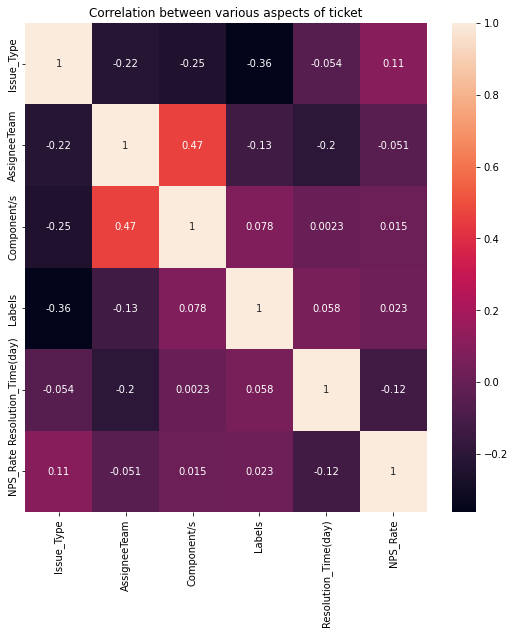

In [67]:
plt.figure(figsize=(9,9))
sns.heatmap(df_npsRt_corr.corr(),annot=True)
plt.title('Correlation between various aspects of ticket')
plt.plot()

### Analysis on ticket creation and resolution 

In [68]:
df_tcktCrtRslv=df_tcktReso.copy()
df_tcktCrtRslv.head()

,Summary,Issue_Type,Status,Priority,Component/s,Labels,Description,Created,Resolved,NPS_Rate,NPS_Rating_Comment,AssigneeTeam,Resolution_Time(day)
0,Cirrus CDO prod and test DataStage needs valid...,Service Request,Closed,Low,DataStage Access Request,Access,Background:\r\n\r\nData movement calls DataSta...,23/Mar/21 11:27 PM,29/Mar/21 7:06 PM,NaN,NaN,Datastage,5.818750
1,New project on Cirrus for mna-contract-harvesting,Service Request,Closed,Lowest,Other Access Request,Access,M&A Contract Harvesting is an existing CDO M&A...,23/Mar/21 10:20 PM,25/Mar/21 1:29 AM,NaN,NaN,L1,1.131250
2,Unable to run SQL in C360 SQL Query Prod,Service Request,Closed,Lowest,CEDP Cloud operations,CloudOther,"Hi Team,\r\n\r\nI got the follow error when I ...",23/Mar/21 9:13 PM,09/Apr/21 8:12 AM,NaN,NaN,CloudOps,16.457639
3,Blue Fringe Setup for ECI Staging Cluster,Service Request,Closed,Lowest,CEDP Cloud operations,CloudOther,I need the following rules to be applied to ac...,23/Mar/21 8:08 PM,25/Mar/21 1:10 PM,NaN,NaN,CloudOps,1.709722
4,Unable to connect to cedp authorization failed...,Service Request,Closed,Lowest,Other Access Request,User_to_Resolve,I find I am unable to connect to CEDP - gettin...,23/Mar/21 7:39 PM,23/Mar/21 8:04 PM,10.0,NaN,L1,0.017361


In [69]:
# Having a new column 'Day_create' with day of ticket creation as value 

df_tcktCrtRslv['Day_create']=pd.to_datetime(df_tcktCrtRslv['Created']).dt.day
df_tcktCrtRslv['Day_create']

0       23
1       23
2       23
3       23
4       23
        ..
4691    26
4692    26
4693    26
4694    26
4695    26
Name: Day_create, Length: 4601, dtype: int64

In [70]:
# Having a new column 'Month_create' with Month of ticket creation as value

df_tcktCrtRslv['Month_create']=pd.to_datetime(df_tcktCrtRslv['Created']).dt.month
df_tcktCrtRslv['Month_create']

0        3
1        3
2        3
3        3
4        3
        ..
4691    10
4692    10
4693    10
4694    10
4695    10
Name: Month_create, Length: 4601, dtype: int64

In [71]:
# Having a new column 'Day_resolved' with day of ticket resolution as value

df_tcktCrtRslv['Day_resolved']=pd.to_datetime(df_tcktCrtRslv['Resolved']).dt.day
df_tcktCrtRslv['Day_resolved']

0       29
1       25
2        9
3       25
4       23
        ..
4691    27
4692    26
4693    29
4694    27
4695    23
Name: Day_resolved, Length: 4601, dtype: int64

In [72]:
# Having a new column 'Month_resolved' with month of ticket resolution as value

df_tcktCrtRslv['Month_resolved']=pd.to_datetime(df_tcktCrtRslv['Resolved']).dt.month
df_tcktCrtRslv['Month_resolved']

0        3
1        3
2        4
3        3
4        3
        ..
4691    10
4692    10
4693    10
4694    10
4695    11
Name: Month_resolved, Length: 4601, dtype: int64

In [73]:
df_tcktCrtRslv.head(2)

,Summary,Issue_Type,Status,Priority,Component/s,Labels,Description,Created,Resolved,NPS_Rate,NPS_Rating_Comment,AssigneeTeam,Resolution_Time(day),Day_create,Month_create,Day_resolved,Month_resolved
0,Cirrus CDO prod and test DataStage needs valid...,Service Request,Closed,Low,DataStage Access Request,Access,Background:\r\n\r\nData movement calls DataSta...,23/Mar/21 11:27 PM,29/Mar/21 7:06 PM,NaN,NaN,Datastage,5.81875,23,3,29,3
1,New project on Cirrus for mna-contract-harvesting,Service Request,Closed,Lowest,Other Access Request,Access,M&A Contract Harvesting is an existing CDO M&A...,23/Mar/21 10:20 PM,25/Mar/21 1:29 AM,NaN,NaN,L1,1.13125,23,3,25,3


In [74]:
# Having a dataframe with count of ticket, categorised by 'Month_create' and 'Day_create'

df_tcktCrtRslv_grpbymdCrt=df_tcktCrtRslv.groupby(['Month_create','Day_create']).count()
df_tcktCrtRslv_grpbymdCrt

Summary  Issue_Type  Status  Priority  Component/s  \
Month_create Day_create                                                       
1            1                 1           1       1         1            1   
             3                 1           1       1         1            1   
             4                16          16      16        16           16   
             5                17          17      17        17           17   
             6                19          19      19        19           19   
...                          ...         ...     ...       ...          ...   
12           24                3           3       3         3            3   
             27                6           6       6         6            6   
             28               11          11      11        11           11   
             29                2           2       2         2            2   
             30                4           4       4         4            4   

                         Labels  Description  Created  Resolved  NPS_Rate  \
Month_create Day_create                                                     
1            1                1            1        1         1         0   
             3                1            1        1         1         1   
             4               16           16       16        16         6   
             5               17           17       17        17         8   
             6               19           19       19        19        10   
...                         ...          ...      ...       ...       ...   
12           24               3            3        3         3         2   
             27               6            6        6         6         4   
             28              11           11       11        11         5   
             29               2            2        2         2         0   
             30               4            4        4         4         2   

                         NPS_Rating_Comment  AssigneeTeam  \
Month_create Day_create                                     
1            1                            0             1   
             3                            0             1   
             4                            3            16   
             5                            3            17   
             6                            5            19   
...                                     ...           ...   
12           24                           0             3   
             27                           0             6   
             28                           0            11   
             29                           0             2   
             30                           0             4   

                         Resolution_Time(day)  Day_resolved  Month_resolved  
Month_create Day_create                                                      
1            1                              1             1               1  
             3                              1             1               1  
             4                             16            16              16  
             5                             17            17              17  
             6                             19            19              19  
...                                       ...           ...             ...  
12           24                             3             3               3  
             27                             6             6               6  
             28                            11            11              11  
             29                             2             2               2  
             30                             4             4               4  

[319 rows x 15 columns]

In [75]:
# Having a dataframe with count of ticket, categorised by 'Month_resolved' and 'Day_resolved'
df_tcktCrtRslv_grpbymdRslv=df_tcktCrtRslv.groupby(['Month_resolved','Day_resolved']).count()
df_tcktCrtRslv_grpbymdRslv

Summary  Issue_Type  Status  Priority  \
Month_resolved Day_resolved                                          
1              2                   1           1       1         1   
               3                   5           5       5         5   
               4                  24          24      24        24   
               5                  19          19      19        19   
               6                  17          17      17        17   
...                              ...         ...     ...       ...   
12             27                  4           4       4         4   
               28                  3           3       3         3   
               29                  1           1       1         1   
               30                  5           5       5         5   
               31                  1           1       1         1   

                             Component/s  Labels  Description  Created  \
Month_resolved Day_resolved                                              
1              2                       1       1            1        1   
               3                       5       5            5        5   
               4                      24      24           24       24   
               5                      19      19           19       19   
               6                      17      17           17       17   
...                                  ...     ...          ...      ...   
12             27                      4       4            4        4   
               28                      3       3            3        3   
               29                      1       1            1        1   
               30                      5       5            5        5   
               31                      1       1            1        1   

                             Resolved  NPS_Rate  NPS_Rating_Comment  \
Month_resolved Day_resolved                                           
1              2                    1         0                   0   
               3                    5         1                   0   
               4                   24         7                   1   
               5                   19         7                   3   
               6                   17         8                   2   
...                               ...       ...                 ...   
12             27                   4         2                   0   
               28                   3         2                   0   
               29                   1         0                   0   
               30                   5         2                   0   
               31                   1         0                   0   

                             AssigneeTeam  Resolution_Time(day)  Day_create  \
Month_resolved Day_resolved                                                   
1              2                        1                     1           1   
               3                        5                     5           5   
               4                       24                    24          24   
               5                       19                    19          19   
               6                       17                    17          17   
...                                   ...                   ...         ...   
12             27                       4                     4           4   
               28                       3                     3           3   
               29                       1                     1           1   
               30                       5                     5           5   
               31                       1                     1           1   

                             Month_create  
Month_resolved Day_resolved                
1              2                        1  
               3                        5  
               4           

In [76]:
# Showing ticket created count for first January month

df_tcktCrtRslv_grpbymdCrt.loc[1]

,Summary,Issue_Type,Status,Priority,Component/s,Labels,Description,Created,Resolved,NPS_Rate,NPS_Rating_Comment,AssigneeTeam,Resolution_Time(day),Day_resolved,Month_resolved
Day_create,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
4,16,16,16,16,16,16,16,16,16,6,3,16,16,16,16
5,17,17,17,17,17,17,17,17,17,8,3,17,17,17,17
6,19,19,19,19,19,19,19,19,19,10,5,19,19,19,19
7,9,9,9,9,9,9,9,9,9,4,1,9,9,9,9
8,13,13,13,13,13,13,13,13,13,5,3,13,13,13,13
9,2,2,2,2,2,2,2,2,2,1,0,2,2,2,2
11,23,23,23,23,23,23,23,23,23,11,3,23,23,23,23


In [77]:
# Showing ticket resolved count for first January month
df_tcktCrtRslv_grpbymdRslv.loc[1]

,Summary,Issue_Type,Status,Priority,Component/s,Labels,Description,Created,Resolved,NPS_Rate,NPS_Rating_Comment,AssigneeTeam,Resolution_Time(day),Day_create,Month_create
Day_resolved,,,,,,,,,,,,,,,
2,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1
3,5,5,5,5,5,5,5,5,5,1,0,5,5,5,5
4,24,24,24,24,24,24,24,24,24,7,1,24,24,24,24
5,19,19,19,19,19,19,19,19,19,7,3,19,19,19,19
6,17,17,17,17,17,17,17,17,17,8,2,17,17,17,17
7,13,13,13,13,13,13,13,13,13,5,2,13,13,13,13
8,11,11,11,11,11,11,11,11,11,7,6,11,11,11,11
10,5,5,5,5,5,5,5,5,5,1,0,5,5,5,5
11,16,16,16,16,16,16,16,16,16,9,3,16,16,16,16


In [78]:
df_tcktCrtRslv_grpbymdCrt.loc[1].index

Int64Index([ 1,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 18, 19, 20,
            21, 22, 23, 24, 25, 26, 27, 28, 29],
           dtype='int64', name='Day_create')

In [79]:
df_tcktCrtRslv_grpbymdCrt['Summary']

Month_create  Day_create
1             1              1
              3              1
              4             16
              5             17
              6             19
                            ..
12            24             3
              27             6
              28            11
              29             2
              30             4
Name: Summary, Length: 319, dtype: int64

In [80]:
Dict_monthNames=['January','February','March','April','May','June','July','August','September','October','November','December']

In [81]:
# Defining a method for visualization of comparison of created and resolved ticket count each day in a month 

def showCreatedResolvedTicketCount():
    m=int(input('Enter the month rank : '))
    if(m<1 or m>12):
        print('Please Enter a valid month rank from 1 to 12 then try again')
    else: 
        plt.figure(figsize=(15,5))
        sns.lineplot(x=df_tcktCrtRslv_grpbymdCrt.loc[m].index,y=df_tcktCrtRslv_grpbymdCrt.loc[m]['Summary'],color='blue',label='Created')
        sns.lineplot(x=df_tcktCrtRslv_grpbymdRslv.loc[m].index,y=df_tcktCrtRslv_grpbymdRslv.loc[m]['Summary'],color='green',label='Resolved')
        plt.title('Created and Resolved ticket count in month of '+Dict_monthNames[m-1])
        plt.xlabel('Day in month')
        plt.ylabel('Count of ticket')
        plt.xticks(range(1,32))
        plt.legend(loc='upper right')
        plt.plot()

Enter the month rank : 1


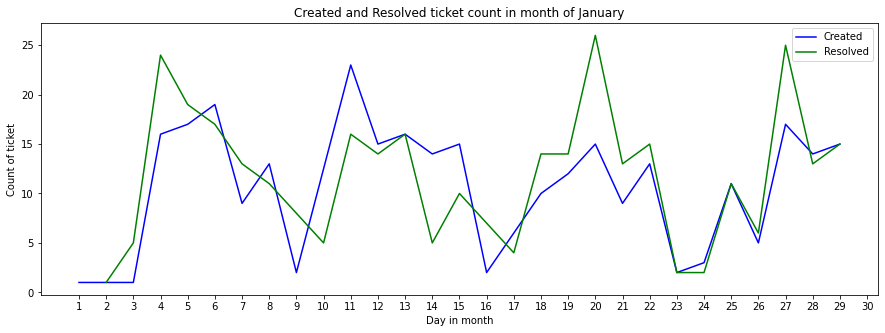

In [82]:
showCreatedResolvedTicketCount()

In [83]:
# Getting count of total created and resolved ticket in each month

Count_TcktCrtPrMnth=[]
for mnth in range(1,13):
    Count_TcktCrtPrMnth.append(df_tcktCrtRslv_grpbymdCrt.xs(mnth)['Summary'].sum())
    
Count_TcktRslvdPrMnth=[]
for mnth in range(1,13):
    Count_TcktRslvdPrMnth.append(df_tcktCrtRslv_grpbymdRslv.xs(mnth)['Summary'].sum())
    
print(Count_TcktCrtPrMnth)
print(Count_TcktRslvdPrMnth)

[289, 365, 421, 465, 426, 418, 323, 460, 394, 370, 385, 285]
[316, 335, 420, 443, 458, 420, 315, 415, 400, 372, 366, 341]


[]

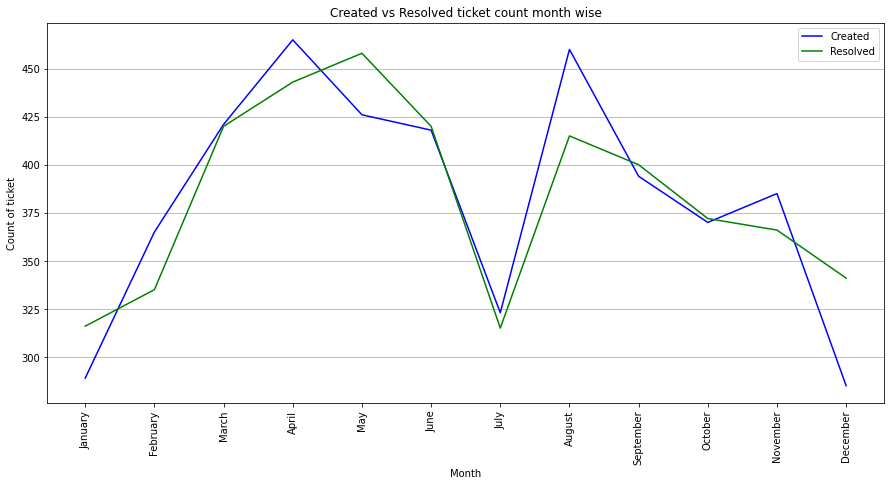

In [84]:
# Visualization of total count of Created and Resolved ticket month wise 

plt.figure(figsize=(15,7))
sns.lineplot(x=Dict_monthNames,y=Count_TcktCrtPrMnth,color='blue',sort=False,markers=True,label='Created')
sns.lineplot(x=Dict_monthNames,y=Count_TcktRslvdPrMnth,color='g',sort=False,markers=True,label='Resolved')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.title('Created vs Resolved ticket count month wise')
plt.xlabel('Month')
plt.ylabel('Count of ticket')
plt.legend(loc='upper right')
plt.plot()

##### From above visualization, it is observed that most of the time created ticket count more than resolved ticket count.
In month of July count of created and resolved both very less, why is this? need to look at that.

## SLA(Service Level Agreement) analysis

##### Loading SLA data

In [85]:
df_sla= pd.read_csv('SLA_met_vs_breached_Summary_2021-01-01_to_2021-12-17_by_month.csv')
df_sla

,Date,Met,Breached
0,January 2021,72,1
1,February 2021,54,1
2,March 2021,88,6
3,April 2021,74,18
4,May 2021,84,15
5,June 2021,80,10
6,July 2021,72,9
7,August 2021,64,16
8,September 2021,54,14
9,October 2021,60,12


In [86]:
df_slaStat=pd.DataFrame({'Sla_status':['Met','Breached'],'Count':[df_sla.Met.sum(),df_sla.Breached.sum()]})
df_slaStat                                                                 

,Sla_status,Count
0,Met,790
1,Breached,137


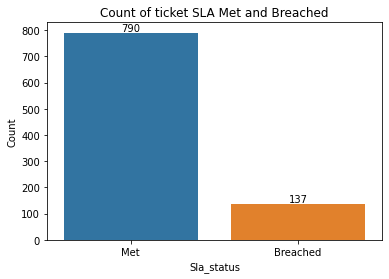

In [87]:
sns.barplot(x=df_slaStat.Sla_status,y=df_slaStat.Count)
plt.title('Count of ticket SLA Met and Breached')
for i in range(2):
    plt.text(i,df_slaStat.Count[i],df_slaStat.Count[i],ha='center',va='bottom')

[]

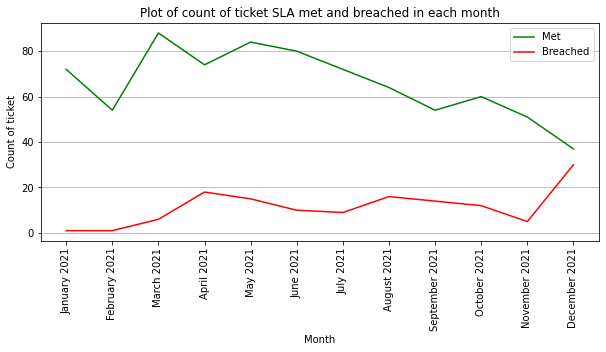

In [88]:
plt.figure(figsize=(10,4))
sns.lineplot(x=df_sla.Date,y=df_sla.Met,color='g',sort=False,label='Met')
sns.lineplot(x=df_sla.Date,y=df_sla.Breached,color='r',sort=False,label='Breached')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.xlabel('Month')
plt.ylabel('Count of ticket')
plt.title('Plot of count of ticket SLA met and breached in each month')
plt.legend()
plt.plot()